## Time Series in Python

In [1]:
import quandl
import json
import requests
import numpy as np

In [3]:
#data from Quandle API
quandl.ApiConfig.api_key = '9KphSw7GRKM9PfSXG6UQ'

#filtering by date so that we can compare the two API responses
response = quandl.get('EIA/PET_RWTC_D', start_date='2022-01-10', end_date='2022-02-08', returns='numpy')

x_t = [x[1] for x in response]

In [91]:
#data from CrytoCompare API
cryptocompareAPI = '9c9005d2d8bc03131d48edfa3bc550aa22980244d00f2956b52f017eec57af90'

#adding timestamp to ensure API data relates to the same timeframe
url = 'https://min-api.cryptocompare.com/data/blockchain/staking/histoday?fsym=ETH&toTs=1644192000&api_key={}'.format(cryptocompareAPI)

response = requests.get(url)
data = json.loads(response.text)

#dates which are not included in Quandl API reponse and so which to exclude from this data.
dates_exclude = ['2022-01-09T','2022-01-15T','2022-01-16T','2022-01-22T','2022-01-23T','2022-01-29T','2022-01-30T','2022-02-05T','2022-02-06T']

y_t = [r['rate'] for r in data['Data']['Data'] if not any(d in r['issued_date'] for d in dates_exclude)]

### Standard OLS formulae

In [92]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Staking Rate ETH, Daily')

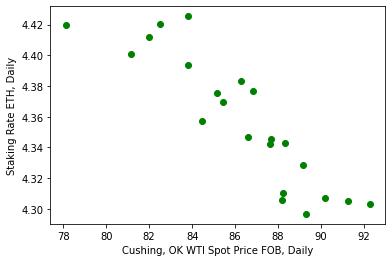

In [94]:
plt.plot(x_t,y_t,'go')
plt.xlabel("Cushing, OK WTI Spot Price FOB, Daily")
plt.ylabel("Staking Rate ETH, Daily")

In [96]:
beta = ((np.multiply(y_t, x_t)).mean()-np.mean(x_t)*np.mean(y_t))/((np.multiply(x_t, x_t)).mean()-np.mean(x_t)*np.mean(x_t))
alpha = np.mean(y_t)-beta*np.mean(x_t)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 5.312639165861963 
beta = -0.011067006073117409


In [99]:
type((np.multiply(y_t, x_t)))
y_hat = alpha + np.multiply(beta,x_t)
L = np.sum(np.multiply(y_t - y_hat,y_t - y_hat))
L

0.007650406238218997

### Gradient Descent

Text(0, 0.5, 'Staking Rate ETH, Daily')

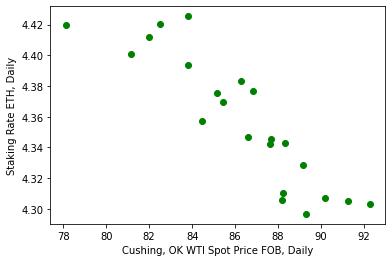

In [100]:
plt.plot(x_t,y_t,'go')
plt.xlabel("Cushing, OK WTI Spot Price FOB, Daily")
plt.ylabel("Staking Rate ETH, Daily")

In [101]:
def  cal_cost(beta0,beta1,x,y):
        n = len(y)
        predictions = beta0 + np.multiply(beta1,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

In [102]:
beta = ((np.multiply(y_t, x_t)).mean()-np.mean(x_t)*np.mean(y_t))/((np.multiply(x_t, x_t)).mean()-np.mean(x_t)*np.mean(x_t))
alpha =np.mean(y_t)-beta*np.mean(x_t)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 5.312639165861963 
beta = -0.011067006073117409


In [103]:
x_new = np.array([[87],[95],[80]])
y_hat = alpha + np.multiply(beta,x_new)

Text(0, 0.5, 'Staking Rate ETH, Daily')

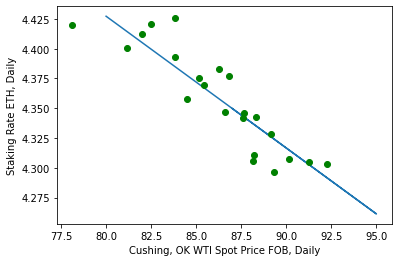

In [106]:
plt.plot(x_new,y_hat)
plt.plot(x_t,y_t,'go')
plt.xlabel("Cushing, OK WTI Spot Price FOB, Daily")
plt.ylabel("Staking Rate ETH, Daily")

In [114]:
alpha = 6
y_hat = alpha + np.multiply(beta,x_new)

Text(0, 0.5, 'Staking Rate ETH, Daily')

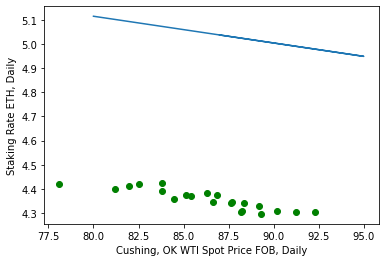

In [116]:
plt.plot(x_new,y_hat)
plt.plot(x_t,y_t,'go')
plt.xlabel("Cushing, OK WTI Spot Price FOB, Daily")
plt.ylabel("Staking Rate ETH, Daily")

In [118]:
cal_cost(alpha,beta,x_t,y_t)
cal_cost(10,beta,x_t,y_t)

5317.1512391061415

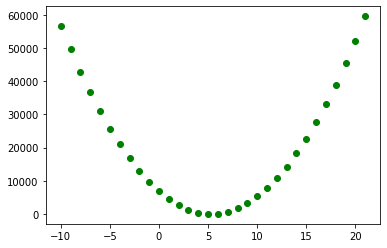

In [123]:
iterations = 32
alpha = -11

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    alpha = alpha +1
    
    loss_history[i] = cal_cost(alpha,beta,x_t,y_t)
    alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

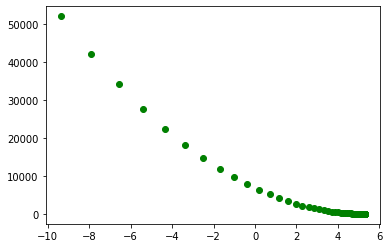

In [127]:
iterations = 1000
alpha = -11
n = len(y_t)

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    
        
        prediction = alpha + np.multiply(beta,x_t)
        residuals = y_t-prediction
        residuals_sum = sum(residuals)
        gradient = -(1/n)*0.1*residuals_sum
 
        alpha = alpha - gradient
    
        loss_history[i] = cal_cost(alpha,beta,x_t,y_t)
        alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

In [128]:
print("alpha =",alpha, "\nbeta =",beta)

alpha = 5.312639165861958 
beta = -0.011067006073117409
